In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

Dataset [Supermarket Sales](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)

In [40]:
df = pd.read_csv('supermarket.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [42]:
df['Date'] = pd.to_datetime(df['Date'])
# Extract the month
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_name'] = df['Date'].dt.day_name()
df.shape

(1000, 20)

In [43]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [44]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [45]:
df.duplicated().sum()

0

In [46]:
df.City.value_counts()

,count
City,
Yangon,340
Mandalay,332
Naypyitaw,328


In [47]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'month', 'day', 'day_name'],
      dtype='object')

In [48]:
df.rename(columns={
    'Customer type' : 'Type',
    'Tax 5%' : 'tax',
    'gross margin percentage' : "Gross_Margin",
    'gross income' : 'Gross_Income',
    'cogs': 'Cogs'
},inplace=True)

In [49]:
revenue_perMonth = (
    df.groupby(by=['City','month'])
    .agg({
        'Total':"sum",

    })
)

In [50]:
revenue_perCity = (
    df.groupby(by=['City'])
    .agg({
        'Total': lambda x: int(x.sum())
    })
)

revenue_perCity

,Total
City,
Mandalay,106197
Naypyitaw,110568
Yangon,106200


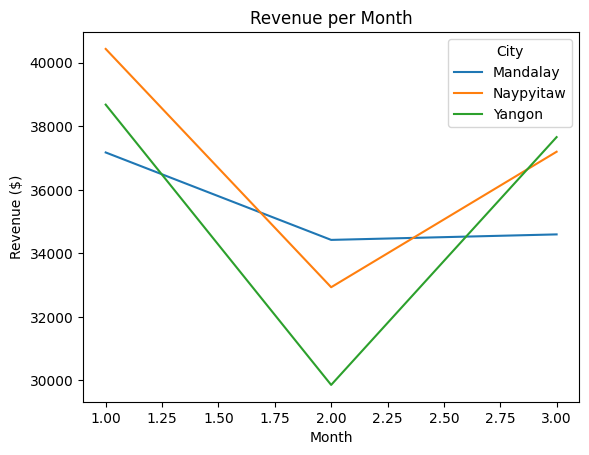

In [51]:
# fill the answer here
sns.lineplot(data=revenue_perMonth,x='month',y='Total',hue='City',errorbar=None)
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.title("Revenue per Month")

plt.savefig("Revenue per month.png", dpi=300, bbox_inches='tight')
# files.download("Revenue per month.png")
plt.show()

In [52]:
def revenue_percentage(revenue_now, revenue_before):
    return round((revenue_now - revenue_before) / revenue_before * 100,0)


In [53]:
revenue_perMonth['prev_Total'] = revenue_perMonth.groupby('City')['Total'].shift(1)
revenue_perMonth['revenue_percentage'] = revenue_perMonth.apply(
    lambda row: revenue_percentage(row['Total'], row['prev_Total']), axis=1
)

In [54]:
revenue_perMonth

Total  prev_Total  revenue_percentage
City      month                                            
Mandalay  1      37176.0585         NaN                 NaN
          2      34424.2710  37176.0585                -7.0
          3      34597.3425  34424.2710                 1.0
Naypyitaw 1      40434.6810         NaN                 NaN
          2      32934.9825  40434.6810               -19.0
          3      37199.0430  32934.9825                13.0
Yangon    1      38681.1285         NaN                 NaN
          2      29860.1205  38681.1285               -23.0
          3      37659.1215  29860.1205                26.0

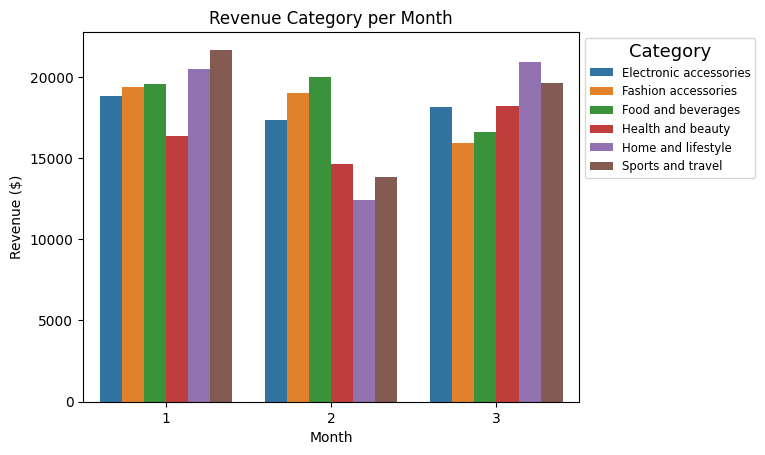

In [56]:
# plt.figure(figsize=(10, 6))
sns.barplot(data=group_category_month,x='month',y='Total',hue='Product line')
plt.legend(title='Category', fontsize='small', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.title("Revenue Category per Month")

plt.savefig("Revenue Category per month.png", dpi=300, bbox_inches='tight')
# files.download("Revenue Category per month.png")
plt.show()

In [57]:
group_category_month['prev_Total'] = group_category_month.groupby(by=['Product line'])['Total'].shift(1)
group_category_month['revenue_percentage'] = group_category_month.apply(
    lambda row: revenue_percentage(row['Total'], row['prev_Total']), axis=1
)

In [58]:
group_category_month

Total  prev_Total  revenue_percentage
Product line           month                                       
Electronic accessories 1      18831         NaN                 NaN
                       2      17362     18831.0                -8.0
                       3      18143     17362.0                 4.0
Fashion accessories    1      19345         NaN                 NaN
                       2      19009     19345.0                -2.0
                       3      15950     19009.0               -16.0
Food and beverages     1      19570         NaN                 NaN
                       2      20000     19570.0                 2.0
                       3      16573     20000.0               -17.0
Health and beauty      1      16383         NaN                 NaN
                       2      14602     16383.0               -11.0
                       3      18208     14602.0                25.0
Home and lifestyle     1      20494         NaN                 NaN
                       2      12434     20494.0               -39.0
                       3      20932     12434.0                68.0
Sports and travel      1      21667         NaN                 NaN
                       2      13809     21667.0               -36.0
                       3      19646     13809.0                42.0

In [59]:
df_byCategory = df[(df['Product line'] == 'Food and beverages') | (df['Product line'] == 'Fashion accessories')]
df_byCategory

,Invoice ID,Branch,City,Type,Gender,Product line,Unit price,Quantity,tax,Total,Date,Time,Payment,Cogs,Gross_Margin,Gross_Income,Rating,month,day,day_name
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2019-02-20,13:27,Credit card,164.52,4.761905,8.2260,5.9,2,20,Wednesday
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.8960,60.8160,2019-02-06,18:07,Ewallet,57.92,4.761905,2.8960,4.5,2,6,Wednesday
13,252-56-2699,A,Yangon,Normal,Male,Food and beverages,43.19,10,21.5950,453.4950,2019-02-07,16:48,Ewallet,431.90,4.761905,21.5950,8.2,2,7,Thursday
18,329-62-1586,A,Yangon,Normal,Male,Food and beverages,54.67,3,8.2005,172.2105,2019-01-21,18:00,Credit card,164.01,4.761905,8.2005,8.6,1,21,Monday
26,649-29-6775,B,Mandalay,Normal,Male,Fashion accessories,33.52,1,1.6760,35.1960,2019-02-08,15:31,Cash,33.52,4.761905,1.6760,6.7,2,8,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,374-38-5555,B,Mandalay,Normal,Female,Fashion accessories,63.71,5,15.9275,334.4775,2019-02-07,19:30,Ewallet,318.55,4.761905,15.9275,8.5,2,7,Thursday
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,2019-03-22,19:06,Credit card,282.80,4.761905,14.1400,4.5,3,22,Friday
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2019-02-22,18:35,Ewallet,174.90,4.761905,8.7450,6.6,2,22,Friday
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,2,9,Saturday


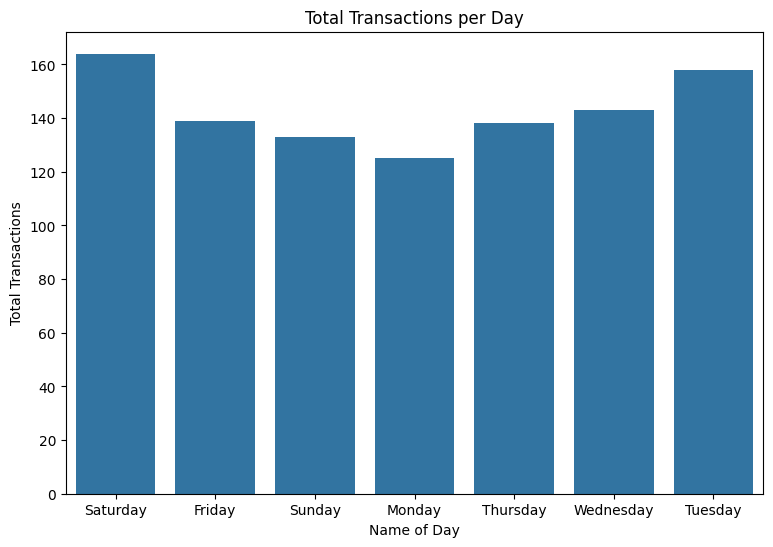

In [60]:
plt.figure(figsize=(9, 6))

sns.countplot(data = df, x = 'day_name')
plt.title('Total Transactions per Day')
plt.xlabel("Name of Day")
plt.ylabel("Total Transactions")
plt.show()

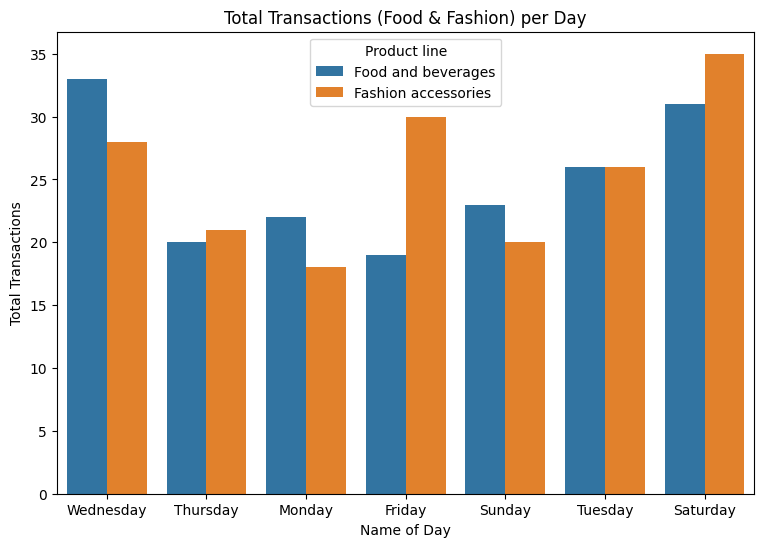

In [61]:
plt.figure(figsize=(9, 6))

sns.countplot(data = df_byCategory, x = 'day_name',hue='Product line')
plt.title('Total Transactions (Food & Fashion) per Day')
plt.xlabel("Name of Day")
plt.ylabel("Total Transactions")

plt.savefig("Total Transaction Category.png", dpi=300, bbox_inches='tight')
# files.download("Total Transaction Category.png")
plt.show()

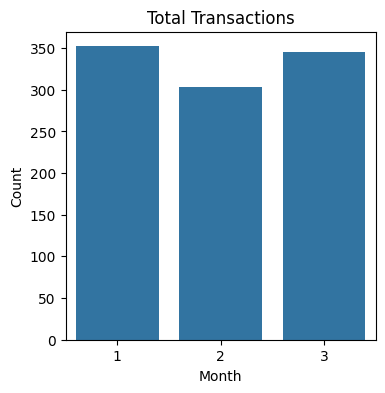

In [62]:
plt.figure(figsize=(4, 4))
sns.countplot(data = df, x = 'month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Total Transactions')
plt.savefig("Busy Month.png", dpi=300, bbox_inches='tight')
# files.download("Busy Month.png")
plt.show()

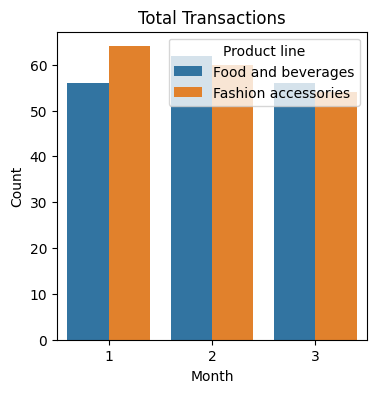

In [63]:


plt.figure(figsize=(4, 4))
sns.countplot(data = df_byCategory, x = 'month',hue='Product line')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Total Transactions')
# plt.savefig("Busy Month.png", dpi=300, bbox_inches='tight')
# files.download("Busy Month.png")
plt.show()